X koordinatlarını girin (virgülle ayırarak):  4,6
Y koordinatlarını girin (virgülle ayırarak):  4,6
Simetri ekseni değerini girin:  5


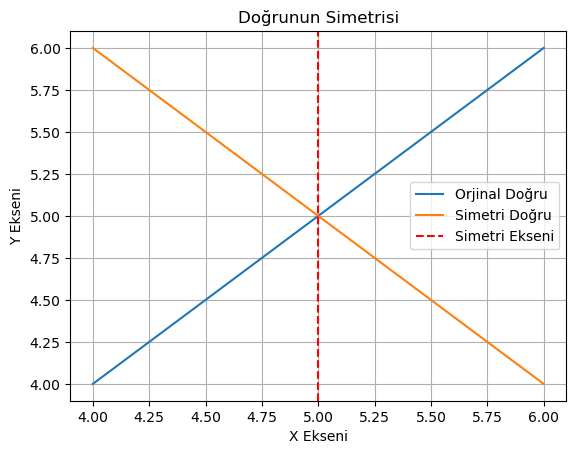

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def simetri_ciz(x, y, simetri_eksen):
    # Verilen koordinatları numpy dizilerine çevir
    x = np.array(x)
    y = np.array(y)
    
    # Simetri eksenine göre simetri işlemi
    simetri_x = 2 * simetri_eksen - x
    
    # Orjinal ve simetri doğrularını çiz
    plt.plot(x, y, label="Orjinal Doğru")
    plt.plot(simetri_x, y, label="Simetri Doğru")
    
    # Simetri eksenini çiz
    plt.axvline(x=simetri_eksen, color='r', linestyle='--', label="Simetri Ekseni")
    
    # Eksen etiketleri ve başlık
    plt.xlabel('X Ekseni')
    plt.ylabel('Y Ekseni')
    plt.title('Doğrunun Simetrisi')
    
    # Legand (açıklama) eklemek için
    plt.legend()
    
    # Grafik göster
    plt.grid(True)
    plt.show()

# Kullanıcıdan koordinatları ve simetri ekseni girişi al
x_koordinat = input("X koordinatlarını girin (virgülle ayırarak): ").split(',')
y_koordinat = input("Y koordinatlarını girin (virgülle ayırarak): ").split(',')
simetri_eksen = float(input("Simetri ekseni değerini girin: "))

# Koordinatları float'a çevir
x_koordinat = [float(x) for x in x_koordinat]
y_koordinat = [float(y) for y in y_koordinat]

# Simetri çizim fonksiyonunu çağır
simetri_ciz(x_koordinat, y_koordinat, simetri_eksen)


Orijinal dairenin merkezi x koordinatını girin:  5
Orijinal dairenin merkezi y koordinatını girin:  5
Orijinal dairenin yarıçapını girin:  3
Yansıma doğrusunun a katsayısını girin:  0
Yansıma doğrusunun b katsayısını girin:  1
Yansıma doğrusunun c katsayısını girin:  0



Orijinal Daire Merkezi: (5.0, 5.0), Yarıçapı: 3.0
Yansıtılan Daire Merkezi: [ 5. -5.], Yarıçapı: 3.0


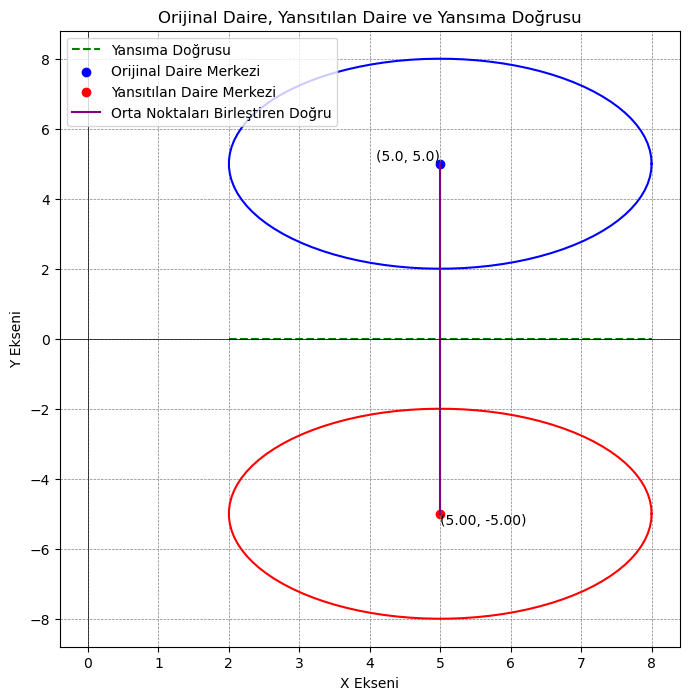

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def daire_ciz(merkez, yaricap, renk='blue'):
    theta = np.linspace(0, 2*np.pi, 100)
    x = merkez[0] + yaricap * np.cos(theta)
    y = merkez[1] + yaricap * np.sin(theta)
    plt.plot(x, y, color=renk)

def yansima(daire_merkez, daire_yaricap, yansima_katsayilari):
    a, b, c = yansima_katsayilari
    
    vektor_buyukluk = np.sqrt(a**2 + b**2)
    birim_vektor = np.array([a/vektor_buyukluk, b/vektor_buyukluk])  #Bu satırda, yansıma doğrusunun birim vektörünün büyüklüğünü hesaplar.
    
    yansitilan_merkez = daire_merkez - 2 * np.dot(daire_merkez, birim_vektor) * birim_vektor   #Yansıma doğrusunun birim vektörünü oluşturur.


    
    return yansitilan_merkez, daire_yaricap  

# Kullanıcıdan giriş al
merkez_x = float(input("Orijinal dairenin merkezi x koordinatını girin: "))
merkez_y = float(input("Orijinal dairenin merkezi y koordinatını girin: "))
yaricap = float(input("Orijinal dairenin yarıçapını girin: "))

a_katsayisi = float(input("Yansıma doğrusunun a katsayısını girin: "))
b_katsayisi = float(input("Yansıma doğrusunun b katsayısını girin: "))
c_katsayisi = float(input("Yansıma doğrusunun c katsayısını girin: "))

# Orijinal daireyi çiz
plt.figure(figsize=(8, 8))
daire_ciz((merkez_x, merkez_y), yaricap, renk='blue')

# Yansıtılan daireyi çiz
yansitilan_merkez, yansitilan_yaricap = yansima((merkez_x, merkez_y), yaricap, (a_katsayisi, b_katsayisi, c_katsayisi))
daire_ciz(yansitilan_merkez, yansitilan_yaricap, renk='red')

# Yansıma doğrusunu çiz
x_dogru = np.linspace(min(merkez_x-yaricap, yansitilan_merkez[0]-yansitilan_yaricap), max(merkez_x+yaricap, yansitilan_merkez[0]+yansitilan_yaricap), 100)
y_dogru = (-a_katsayisi * x_dogru - c_katsayisi) / b_katsayisi
plt.plot(x_dogru, y_dogru, label='Yansıma Doğrusu', linestyle='--', color='green')

# Orijinal ve yansıtılan dairelerin merkezlerini işaretle ve koordinatlarını yaz
plt.scatter(merkez_x, merkez_y, color='blue', label='Orijinal Daire Merkezi')
plt.text(merkez_x, merkez_y, f'({merkez_x}, {merkez_y})', ha='right', va='bottom')

plt.scatter(yansitilan_merkez[0], yansitilan_merkez[1], color='red', label='Yansıtılan Daire Merkezi')
plt.text(yansitilan_merkez[0], yansitilan_merkez[1], f'({yansitilan_merkez[0]:.2f}, {yansitilan_merkez[1]:.2f})', ha='left', va='top')

# Ortayı birleştiren doğruyu çiz
plt.plot([merkez_x, yansitilan_merkez[0]], [merkez_y, yansitilan_merkez[1]], linestyle='-', color='purple', label='Orta Noktaları Birleştiren Doğru')

# Eksenleri ve başlıkları ekle
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Orijinal Daire, Yansıtılan Daire ve Yansıma Doğrusu')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.legend()

# Merkez koordinatlarını ve yarıçapları ekrana yazdır
print(f"\nOrijinal Daire Merkezi: ({merkez_x}, {merkez_y}), Yarıçapı: {yaricap}")
print(f"Yansıtılan Daire Merkezi: {yansitilan_merkez}, Yarıçapı: {yansitilan_yaricap}")

plt.show()




İlk doğru katsayısı a1:  0
İlk doğru katsayısı b1:  1
İlk doğru katsayısı c1:  1
Yansıtılacak doğru katsayısı a2:  0
Yansıtılacak doğru katsayısı b2:  1
Yansıtılacak doğru katsayısı c2:  0


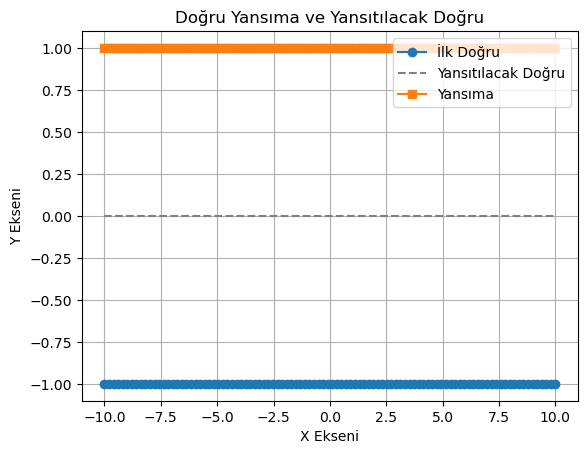

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Kullanıcıdan ilk doğru parametrelerini al
a1 = float(input("İlk doğru katsayısı a1: "))
b1 = float(input("İlk doğru katsayısı b1: "))
c1 = float(input("İlk doğru katsayısı c1: "))

# Kullanıcıdan yansıtılacak doğru parametrelerini al
a2 = float(input("Yansıtılacak doğru katsayısı a2: "))
b2 = float(input("Yansıtılacak doğru katsayısı b2: "))
c2 = float(input("Yansıtılacak doğru katsayısı c2: "))

# Yansıma işlemi
a3 = a1 - 2 * a2 * (a1*a2 + b1*b2) / (a2**2 + b2**2)
b3 = b1 - 2 * b2 * (a1*a2 + b1*b2) / (a2**2 + b2**2)
c3 = c1 - 2 * c2 * (a1*a2 + b1*b2) / (a2**2 + b2**2)

# Çizim için figür ve eksen oluştur
fig, ax = plt.subplots()

# İlk doğruyu çiz
x_vals1 = np.linspace(-10, 10, 100)
y_vals1 = (-a1 * x_vals1 - c1) / b1
ax.plot(x_vals1, y_vals1, label='İlk Doğru', linestyle='-', marker='o')

# Yansıma doğrusunu çiz
y_vals2 = (-a2 * x_vals1 - c2) / b2
ax.plot(x_vals1, y_vals2, label='Yansıtılacak Doğru', linestyle='--', color='gray')

# Yansımayı çiz
x_vals3 = np.linspace(-10, 10, 100)
y_vals3 = (-a3 * x_vals3 - c3) / b3
ax.plot(x_vals3, y_vals3, label='Yansıma', linestyle='-', marker='s')

# Eksen etiketleri ve başlıklar
ax.set_xlabel('X Ekseni')
ax.set_ylabel('Y Ekseni')
ax.set_title('Doğru Yansıma ve Yansıtılacak Doğru')

# Legend (açıklamalar)
ax.legend()

# Grid eklemek (isteğe bağlı)
ax.grid(True)

# Grafiği göster
plt.show()
